# **Coffee Sale Analysis**

# Introduction

We have a dataset that includes transaction dates, timestamps, locations, and detailed product information. We will conduct an in-depth analysis and visualization to gain a comprehensive understanding of the dataset, uncover key trends, and analyze sales patterns over time.

The Analysis will focus on the how different factors such as time of the day, day or month will have an impact on the sales perfromace. We will be utlising different visualisation techniques such as graph and charts to understand the sales trend.

Importing the libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from wordcloud import WordCloud
from datetime import datetime
import calendar

Reading the coffee Shop sales file for the analysis

In [145]:
df=pd.read_excel('/content/drive/MyDrive/Data/Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


Now we will understand the data.

In [146]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


## Data Cleaning & transformation

Check for Null values in the dataset

In [147]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


Extract the hour, day and month name from the transaction date and time, to analyse on which day the sales transaction was made.

In [148]:
df['Day']=pd.to_datetime(df['transaction_date']).dt.day_name()
df['Month']=pd.to_datetime(df['transaction_date']).dt.month_name()
df['time']=pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

We will create a new column 'sale_time' to capture continous time interval. This will be used in our data analysis section.

In [149]:
df['sale_time']=df['time'].apply(lambda x:'Before 6 am' if x>23 and x<=6
                             else '06 - 08' if x>6 and x<=8
                             else '08 - 10' if x>8 and x<=10
                             else '10 - 12' if x>10 and x<=12
                             else '12 - 14' if x>12 and x<=14
                             else '14 - 16' if x>14 and x<=16
                             else '16 - 18' if x>16 and x<=18
                             else '18 - 20' if x>18 and x<=20
                             else 'After 20')

Lets return the top 5 records in the dataset

In [150]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Day,Month,time,sale_time
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,January,7,06 - 08
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,7,06 - 08
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,January,7,06 - 08
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,January,7,06 - 08
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,7,06 - 08


We will create a new column 'price' which will result the product of the beverages brought (transaction quantity) and the price of the beverage.

In [155]:
df['price']=df.transaction_qty*df.unit_price
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Day,Month,time,sale_time,price
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,January,7,06 - 08,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,7,06 - 08,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,January,7,06 - 08,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,January,7,06 - 08,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,7,06 - 08,6.2


We will reorder the Months to January, February, March,...

In [152]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

We will reorder the days to Monday, Tueday,...

In [153]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

# Data Analysis

In [154]:
print(df.groupby('product_type').min('unit_price').price.sort_values(ascending=False).head())
print(df.groupby('product_type').min('unit_price').price.sort_values(ascending=True).head())

product_type
Clothing             23.00
Premium Beans        19.75
House blend Beans    18.00
Gourmet Beans        15.00
Espresso Beans       14.75
Name: price, dtype: float64
product_type
Regular syrup            0.8
Sugar free syrup         0.8
Gourmet brewed coffee    2.0
Drip coffee              2.0
Barista Espresso         2.1
Name: price, dtype: float64


Clothing is the most expensive product type and Gourmet brewed coffee and Drip coffee  is the least expensive in the store.

In [136]:
print(df.groupby('product_category').min('unit_price').price.sort_values(ascending=False).head())
print(df.groupby('product_category').min('unit_price').price.sort_values(ascending=True).head())

product_category
Branded               12.00
Coffee beans          10.00
Loose Tea              8.95
Packaged Chocolate     6.40
Drinking Chocolate     3.50
Name: price, dtype: float64
product_category
Flavours              0.80
Coffee                2.00
Tea                   2.50
Bakery                2.65
Drinking Chocolate    3.50
Name: price, dtype: float64


Branded is the most expensive product category and Coffee is the least expensive drink in the store.

In [138]:
print(df.groupby('product_detail').min('unit_price').price.sort_values(ascending=False).head())
print(df.groupby('product_detail').min('unit_price').price.sort_values(ascending=True).head())

product_detail
Civet Cat                  45.00
I Need My Bean! T-shirt    23.00
Ethiopia                   21.00
Primo Espresso Roast       20.45
Jamacian Coffee River      19.75
Name: price, dtype: float64
product_detail
Carmel syrup                   0.8
Chocolate syrup                0.8
Hazelnut syrup                 0.8
Sugar Free Vanilla syrup       0.8
Our Old Time Diner Blend Sm    2.0
Name: price, dtype: float64


Civet Cat is the most expensive item in the store, It's the most premium coffee beans in the store.

Our Old Time Diner Blend Sm is the least expenisve item in the stores. It is a type of Drip coffee


In [15]:
product_sales=df.groupby(['Month','product_type',]).sum('price').price.unstack()
product_sales

product_type,Barista Espresso,Biscotti,Black tea,Brewed Black tea,Brewed Chai tea,Brewed Green tea,Brewed herbal tea,Chai tea,Clothing,Drinking Chocolate,...,Housewares,Organic Beans,Organic Chocolate,Organic brewed coffee,Pastry,Premium Beans,Premium brewed coffee,Regular syrup,Scone,Sugar free syrup
Month,,,,,,,,,,,,,,,,,,,,,
April,15555.90,3232.07,420.65,8023.5,13291.95,3991.5,8050.0,738.70,896.0,554.03,...,1483.0,1486.5,319.2,6611.0,4362.40,2631.75,6568.30,1033.6,6427.23,384.8
February,10027.15,2240.88,340.10,5369.5,8383.40,2754.5,5226.0,467.25,476.0,276.22,...,759.0,847.0,174.8,4077.5,2815.16,1261.00,4149.10,669.6,3982.78,260.8
January,10461.20,2311.02,375.90,5535.5,8761.45,2883.5,5441.5,383.90,1008.0,316.74,...,882.0,1076.0,205.2,4609.1,2875.58,1981.00,4530.95,721.6,4349.15,252.8
June,21860.00,4663.34,626.50,11350.5,18188.15,5493.5,11211.0,1184.65,1558.0,612.16,...,1855.0,2065.5,380.0,8775.0,6036.04,4057.50,9241.50,1430.4,8551.89,577.6
March,13078.20,2928.20,411.70,6875.0,11029.65,3325.0,6681.0,564.85,807.0,375.40,...,994.0,1277.0,212.8,5323.7,3724.59,1531.00,5552.10,861.6,5249.79,310.4
May,20423.75,4418.02,537.00,10778.0,17427.35,5404.5,10930.0,961.90,1418.0,593.49,...,1471.0,1757.5,387.6,8350.2,5842.22,3121.25,8739.20,1368.0,8305.28,537.6


We can see different product types sales throughtout months

In [36]:
# Reorder columns by total sales descending
ordered_cols = product_sales.sum().sort_values(ascending=False).index
product_sales = product_sales[ordered_cols]
product_sales

product_type,Barista Espresso,Brewed Chai tea,Hot chocolate,Gourmet brewed coffee,Brewed Black tea,Brewed herbal tea,Premium brewed coffee,Organic brewed coffee,Scone,Drip coffee,...,Espresso Beans,Chai tea,House blend Beans,Herbal tea,Drinking Chocolate,Black tea,Sugar free syrup,Organic Chocolate,Green tea,Green beans
Month,,,,,,,,,,,,,,,,,,,,,
April,15555.90,13291.95,12266.75,11820.5,8023.5,8050.0,6568.30,6611.0,6427.23,5415.5,...,783.45,738.70,594.0,438.55,554.03,420.65,384.8,319.2,231.25,210.0
February,10027.15,8383.40,8132.25,7651.7,5369.5,5226.0,4149.10,4077.5,3982.78,3363.5,...,674.50,467.25,288.0,313.25,276.22,340.10,260.8,174.8,157.25,170.0
January,10461.20,8761.45,8337.75,8072.1,5535.5,5441.5,4530.95,4609.1,4349.15,3583.5,...,806.25,383.90,486.0,349.05,316.74,375.90,252.8,205.2,185.00,230.0
June,21860.00,18188.15,17106.00,17142.0,11350.5,11211.0,9241.50,8775.0,8551.89,7770.5,...,1229.65,1184.65,810.0,626.50,612.16,626.50,577.6,380.0,333.00,250.0
March,13078.20,11029.65,10253.50,9789.1,6875.0,6681.0,5552.10,5323.7,5249.79,4560.5,...,857.20,564.85,378.0,420.65,375.40,411.70,310.4,212.8,249.75,190.0
May,20423.75,17427.35,16319.75,15559.2,10778.0,10930.0,8739.20,8350.2,8305.28,7290.5,...,1209.20,961.90,738.0,581.75,593.49,537.00,537.6,387.6,314.50,290.0


As we can see above, June has the most sales, followed by May.


Now, lets observe the revenue generated in each store throughout the months.

In [41]:
store_sales=df.groupby(['Month','store_location'],observed=True).sum('price').price.unstack()
store_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
Month,,,
January,27313.66,27820.65,26543.43
February,25105.34,25719.80,25320.05
March,32835.43,33110.57,32888.68
April,39477.61,40304.14,39159.33
May,52428.76,52598.93,51700.07
June,55083.11,56957.08,54445.69


As we can see, Hell's Kitchen has the most sales compared to Astoria and Lower Manhattan. We can observe the sales gradually increasing thorughout the months, reaching a significant peak in both May and June.

In [18]:
month_sales=df.groupby(['Month','product_category']).sum('price').price.unstack()
month_sales

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
Month,,,,,,,,,
April,14021.70,2379.0,45971.20,6824.70,12266.75,1418.4,1829.15,873.23,33356.95
February,9038.82,1235.0,29268.95,4077.50,8132.25,930.4,1277.85,451.02,21733.40
January,9535.75,1890.0,31256.85,5245.25,8337.75,974.4,1293.85,521.94,22621.95
June,19251.27,3413.0,64789.00,9912.65,17106.00,2008.0,2770.65,992.16,46243.15
March,11902.58,1801.0,38303.60,5256.20,10253.50,1172.0,1646.95,588.20,27910.65
May,18565.52,2889.0,60362.85,8768.95,16319.75,1905.6,2395.15,981.09,44539.85


Now lets visualise the different types of product category and the quantity of product types brought overall.

In [20]:
item_qty=df.groupby(["product_category", "product_type"]).size().reset_index(name='qty')
item_qty

,product_category,product_type,qty
0,Bakery,Biscotti,5711
1,Bakery,Pastry,6912
2,Bakery,Scone,10173
3,Branded,Clothing,221
4,Branded,Housewares,526
5,Coffee,Barista Espresso,16403
6,Coffee,Drip coffee,8477
7,Coffee,Gourmet brewed coffee,16912
8,Coffee,Organic brewed coffee,8489
9,Coffee,Premium brewed coffee,8135


# Data Visualisation

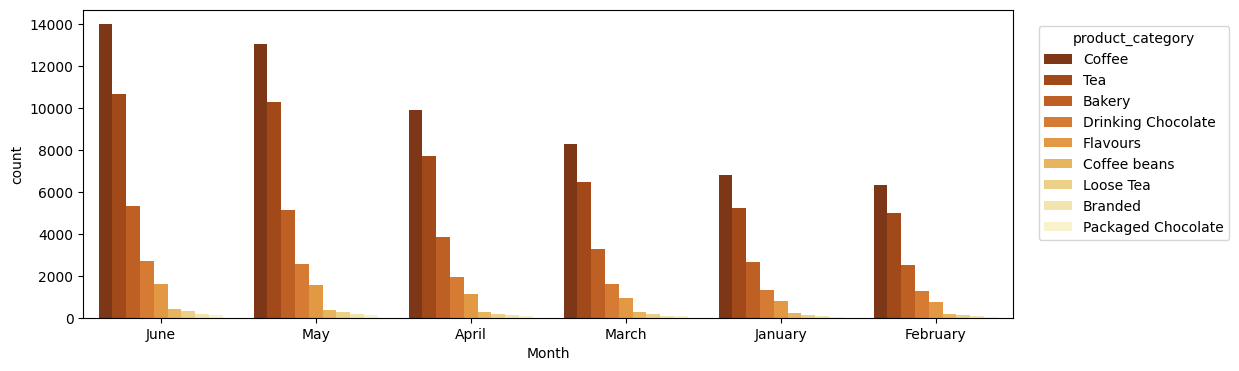

In [47]:
month_data=df.groupby('Month')['product_category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,4))
ax=sns.barplot(data=month_data,x='Month',y='count',hue='product_category', palette='YlOrBr_r')
sns.move_legend(ax, "right",bbox_to_anchor=(1.24,0.6))

From the above visualisation, we can observe the
*   June month has the most sales, followed by May and April.
*   Coffee is the most popular beverage and driving a significant portion of the sales generated.

<Axes: xlabel='transaction_date'>

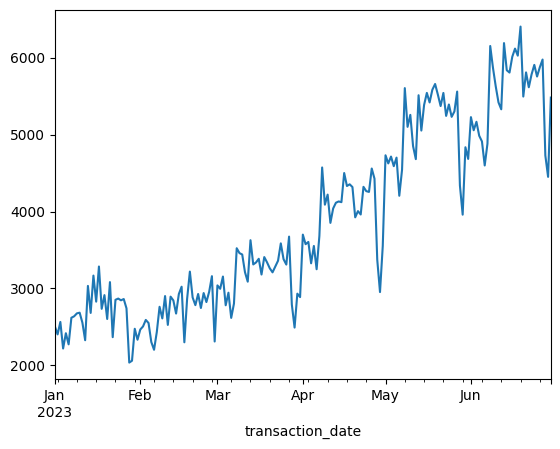

In [29]:
total_sales=df.groupby(['transaction_date']).sum('price')['price']
total_sales.plot()

From the above graph, we can observe how theres a spike in sale, on the start of the Month and , a noticeable drop towards the end of the month.

In [76]:
month_sale=df.groupby('Months', observed=True).sum('price').price.reset_index()
fig=px.line(month_sale,x='Months',y='price')
fig.update_traces(
    line=dict(color='royalblue', width=4),  # Smooth blue line with wider width
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),  # Markers with red color and white borders
    mode='lines+markers'  # Adding both lines and markers

)

# Enhance layout with gridlines, background color, and text styling
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales',
    title='Sales over Month',
    plot_bgcolor='lavender',  # Background color for the plot area
    paper_bgcolor='whitesmoke',  # Background color for the overall paper
)


From the above line chart, we can see a steady growth in the sales from January to June.

In [122]:
day_data=df.groupby(['Day'], observed=True).sum('price').price.reset_index()
fig=px.line(day_data,x='Day',y='price')
fig.update_traces(
    line=dict(color='royalblue', width=4),  # Smooth blue line with wider width
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),  # Markers with red color and white borders
    mode='lines+markers'  # Adding both lines and markers

)

# Enhance layout with gridlines, background color, and text styling
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales',
    title='Sales over Day',
    plot_bgcolor='lavender',  # Background color for the plot area
    paper_bgcolor='whitesmoke',  # Background color for the overall paper
)


From the above line chart, we can see Monday has the most sales, then we can observe it starts dropping. Saturday has the least sales.

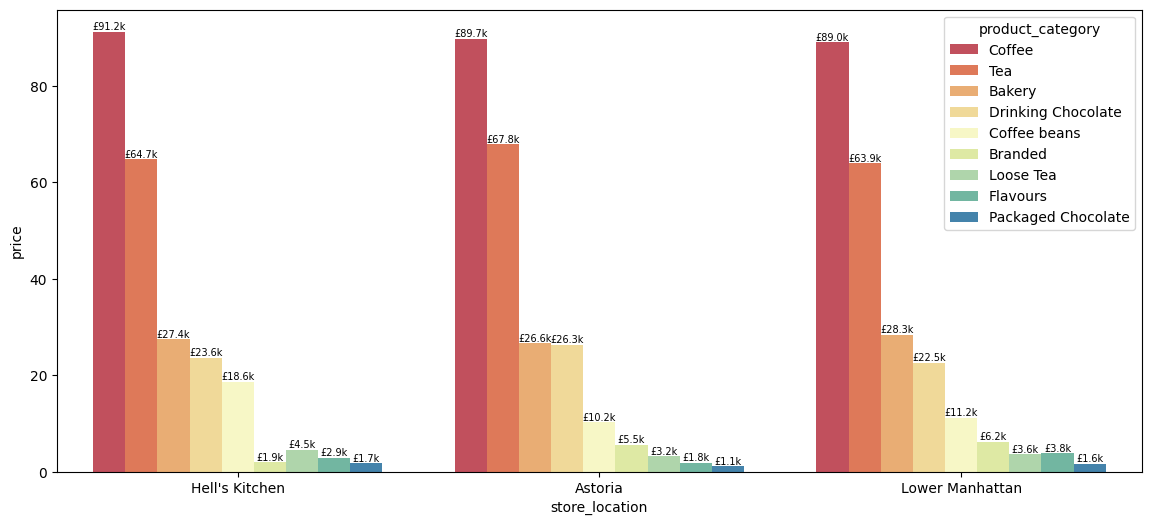

In [74]:
store_data=df.groupby(['product_category','store_location']).sum('price').price.sort_values(ascending=False)*0.001
store_data=round(store_data,1).reset_index()
plt.figure(figsize=(14,6))
ax=sns.barplot(data=store_data,x='store_location',y='price', hue='product_category', palette='Spectral')
for container in ax.containers:
    ax.bar_label(container, fontsize=7, labels=[f"£{v.get_height()}k" for v in container])

From the above visualisation, we can observe the Hells' Kitchen generates the most revenue. Whilst Coffee being the most popular drink, followed by tea and bakery.

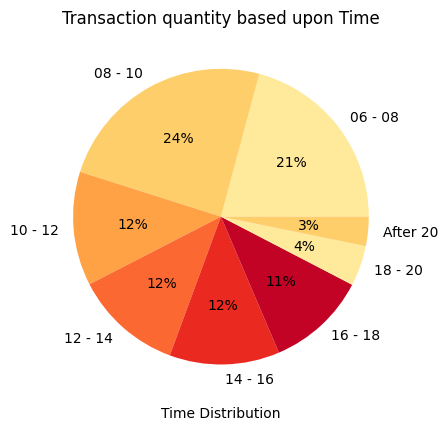

In [55]:
sale_qty=df.groupby('sale_time').sum('transaction_qty').transaction_qty.reset_index()
palette_color = sns.color_palette('YlOrRd',6)
plt.pie(data=sale_qty,x='transaction_qty',colors=palette_color,labels='sale_time',autopct='%.0f%%',)
plt.title('Transaction quantity based upon Time')
plt.xlabel('Time Distribution')
plt.show()

From the Pie chart, we can observe how majority of transactions occurs in the morning from 6am to 10 am, contributing to the 45% transactions.

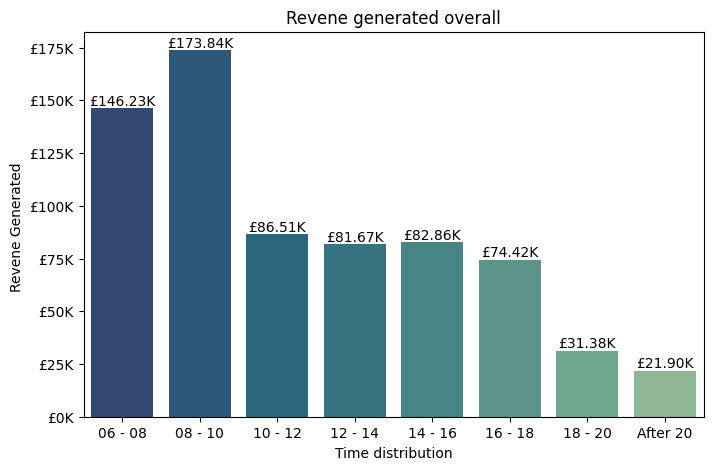

In [28]:

from matplotlib.ticker import FuncFormatter

sales_data=df.groupby('sale_time').sum('price').price*0.001
sales_data=round(sales_data,2).reset_index()
sales_data['price1']=(sales_data.price).astype(str)+'k'
plt.figure(figsize=(8,5))
ax=sns.barplot(data=sales_data,x='sale_time',y='price',hue='sale_time', palette='crest_r')
plt.title('Revene generated overall')
plt.xlabel('Time distribution')
plt.ylabel('Revene Generated ')

formatter = FuncFormatter(lambda x, _: f'£{x:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)

for container in ax.containers:
  ax.bar_label(container, fontsize=10,labels=[f"£{v.get_height():,.2f}K" for v in container])

From the above bar graph, we can observe, 6am to 10am is the most busiest time period, and generates the heighest revenue during this time period.

## Conclusion


From the above data analysis, we can conclude the following:

1.   Coffee is the most popular beverage, followed by tea and bakery
2.   Coffee makes a significant contribution to the overall revenue.
3.   There is a spike in the sales in the beginning of the month and a drop towards the end of the month.
4. Morning 6 a.m to 10 a.m is the most busiest time of the day,and most revenue generated during that time
5. Majority of the sales transaction occurs in the morning, accounting for 45% of the daily transactions.
6. Sales starts dropping significantely after 6 p.m in the evening.
7. There is a steady growth in the sales throughout the months, whilst June has the most sales.
8. Monday has the most sales and Saturday has the least sales.